# Veille et enjeux - Code DBGAN

Téléchargez ou créez un jeu de données d'images de vélos. Assurez-vous que les images sont de bonne qualité et qu'elles sont étiquetées correctement pour que le réseau puisse les utiliser correctement.

Installez les bibliothèques de deep learning python nécessaires pour construire et entraîner le réseau DCGAN, telles que TensorFlow, Keras, PyTorch, etc.

In [2]:
#pip install tensorflow keras pytorch

In [3]:
import tensorflow as tf
import keras
import os
import numpy as np
from PIL import Image

c:\Users\julia\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Charger les images à partir du fichier drive
# from google.colab import drive
# drive.mount('/content/drive')
# path = "drive/MyDrive/Années scolaires_Annabel/A5_ESILV/Veille et enjeux technologiques/data_noir_blanc - 100"

In [5]:
# Charger les images à partir du fichier en local
path="C://Users//julia//Documents//A5//Veille et enjeu technologique//GAN_image-generator//data_noir_blanc - 100"

In [6]:
img_data = Image.open(path+'/1.png')
img_arr = np.array(img_data)
img_arr.shape

(710, 1536, 3)

In [7]:
# Empty numpy array to store the images
images = []

# For each image in the folder
for filename in os.listdir(path):
    #print(filename)
    # Read the image
    img = Image.open(path+"/"+filename)
    # Convert the image to a numpy array
    img_arr = np.array(img)

    RVB = lambda x: [xi[0] for xi in x]
    img_arr_1D = np.array([RVB(x) for x in img_arr])
    img_arr_1D = (img_arr_1D / 255.0).astype("float32")

    # Append the image to the array
    images.append(img_arr_1D)
images = np.array(images)

In [8]:
print(images)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 ...

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]


50 images de 1024*1024 pixels ;
à chaque fois une dimention R, V, B (d'où le 3)

In [9]:
images.shape

(102, 710, 1536)

In [10]:
# Charger les données d'entraînement à partir d'un fichier numpy
train_data = tf.data.Dataset.from_tensor_slices(images)

In [11]:
print(type(train_data))

<class 'tensorflow.python.data.ops.from_tensor_slices_op.TensorSliceDataset'>


Importez les bibliothèques nécessaires dans votre script python et chargez les données d'entraînement à partir du fichier d'images de vélos.

Pour créer un modèle DCGAN en python, vous pouvez utiliser les fonctions de construction de réseaux de neurones fournies par les bibliothèques de deep learning. Par exemple, si vous utilisez TensorFlow et Keras, vous pouvez utiliser les instructions suivantes pour construire le générateur et le discriminant :

## Generator et discriminator

In [12]:
# Input dimensionality for generator
codings_size = 30

generator = keras.Sequential(
    [
        keras.layers.Dense(100, activation="selu", input_shape=(codings_size,)),
        keras.layers.Dense(150, activation="selu"),
        keras.layers.Dense(710 * 1536, activation="sigmoid"),
        keras.layers.Reshape((710, 1536)),
    ],
    name="generator"
)
discriminator = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(710, 1536)),
        keras.layers.Dense(150, activation="selu"),
        keras.layers.Dense(100, activation="selu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator"
)

In [13]:
gan = keras.Sequential([generator, discriminator])

# Print GAN model summary
gan.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 generator (Sequential)      (None, 710, 1536)         164692810 
                                                                 
 discriminator (Sequential)  (None, 1)                 163599351 
                                                                 
Total params: 328,292,161
Trainable params: 328,292,161
Non-trainable params: 0
_________________________________________________________________


In [14]:
# The generator is trained through the GAN model: no need to compile it

discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")

# The trainable attribute is taken into account only when compiling a model
# Discriminator weights will be updated only when it will be trained on its own
# They will be frozen when the whole GAN model will be trained
discriminator.trainable = False

gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [15]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print(f"Epoch [{epoch+1}/{n_epochs}]...")
        for x_batch in dataset:
            # Phase 1 - training the discriminator
            noise = tf.random.normal(shape=(batch_size, codings_size))
            generated_images = generator(noise)
            # Gather an equal number of generated (y=0) and real (y=1) images
            x_discr = tf.concat([generated_images, x_batch], axis=0)
            y_discr = tf.constant([[0.0]] * batch_size + [[1.0]] * batch_size)
            # https://stackoverflow.com/a/49100617
            discriminator.train_on_batch(x_discr, y_discr)
            
            # Phase 2 - training the generator
            noise = tf.random.normal(shape=(batch_size, codings_size))
            # Generated images should be labeled "real" by the discriminator
            y_gen = tf.constant([[1.0]] * batch_size)
            # Update only the generator weights (see above)
            gan.train_on_batch(noise, y_gen)
    print("Training complete!")

En local, environ 1 min = 4 epoch

In [17]:
batch_size = 32

# Load images in batches
dataset = train_data
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

# Train the GAN model
train_gan(gan, dataset, batch_size, codings_size, n_epochs=100)

Epoch [1/100]...
Epoch [2/100]...
Epoch [3/100]...
Epoch [4/100]...
Epoch [5/100]...
Epoch [6/100]...
Epoch [7/100]...
Epoch [8/100]...
Epoch [9/100]...
Epoch [10/100]...
Epoch [11/100]...
Epoch [12/100]...
Epoch [13/100]...
Epoch [14/100]...
Epoch [15/100]...
Epoch [16/100]...
Epoch [17/100]...
Epoch [18/100]...
Epoch [19/100]...
Epoch [20/100]...
Epoch [21/100]...
Epoch [22/100]...
Epoch [23/100]...
Epoch [24/100]...
Epoch [25/100]...
Epoch [26/100]...
Epoch [27/100]...
Epoch [28/100]...
Epoch [29/100]...
Epoch [30/100]...
Epoch [31/100]...
Epoch [32/100]...
Epoch [33/100]...
Epoch [34/100]...
Epoch [35/100]...
Epoch [36/100]...
Epoch [37/100]...
Epoch [38/100]...
Epoch [39/100]...
Epoch [40/100]...
Epoch [41/100]...
Epoch [42/100]...
Epoch [43/100]...
Epoch [44/100]...
Epoch [45/100]...
Epoch [46/100]...
Epoch [47/100]...
Epoch [48/100]...
Epoch [49/100]...
Epoch [50/100]...
Epoch [51/100]...
Epoch [52/100]...
Epoch [53/100]...
Epoch [54/100]...
Epoch [55/100]...
Epoch [56/100]...
E

In [18]:
#import libraries
import cv2
from matplotlib import pyplot as plt


def plot_multiple_images(generated_images, n=4):
  """code for displaying multiple images in one figure"""

  # create figure
  fig = plt.figure(figsize=(10, 7))

  # setting values to rows and column variables
  rows = 2
  columns = 2

  for i in range(n):
    #reading image
    img = generated_images[i]
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, i+1)
    # showing image
    plt.imshow(img)
    plt.axis('off')
    plt.title(str(i))

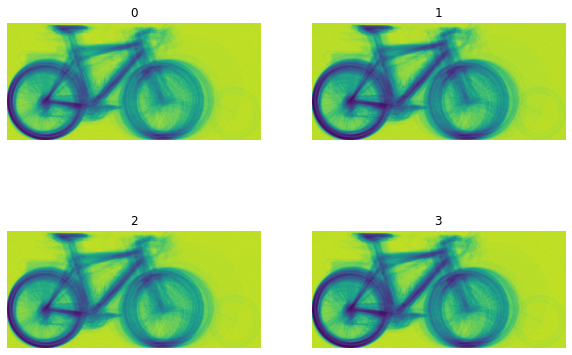

In [19]:
noise = tf.random.normal(shape=(batch_size, codings_size))
generated_images = generator(noise)
plot_multiple_images(generated_images, 4)